# PHAS0030 Assignment Week 5

Ben Elliot 21005900

We will investigate the heat equation in two forms, the 2D steady state and the 2D time-varying version.
$\newline$
The equation for the steady state (equivalent to Laplace's equation) is:
$\newline$

$$\frac{\partial^2 \theta}{\partial x^2} + \frac{\partial^2 \theta}{\partial y^2} = 0$$

$\newline$
The equation for the time-varying version is:
$\newline$
$$\frac{\partial \theta}{\partial t} = \frac{\partial^2 \theta}{\partial x^2} + \frac{\partial^2 \theta}{\partial y^2}$$

To solve these equations we will be using the iterative Gauss-Seidal succesive over-relaxation solver.

We will be studying a bar which is 21m long and 15m wide. The end of the bar at x=21m will be held at 400K while the other boundaries will be held at 300K throughout. We will start with an initial guess of the full bar except the boundary at x=21m being at 300K.

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. Set up the SOR solver

In [2]:
def update_GS_SOR(phi, M, N, omega):
    """Update NxM grid of phi using SOR and Gauss-Seidel
    Inputs:
    phi: 2D array of temperatures
    M: Length of bar in x (starting with bar at x=0)
    N: Length of bar in y (starting with bar at x=0)
    omega: Constant between 0 and 1 for convergence
    
    Returns:
    phi: Updated temperature 2D array
    """
    for i in range(1,N-1):
        for j in range(1,M-1):
            phi[i,j] = omega*1/4*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1]) + (1 - omega)*phi[i,j]
    return phi

### 2. Set up the array and initial conditions
The length and width of the bar variables (N, M) is 1 higher than the distance in meters as I also included the zero point of the bar.

Text(0.5, 1.0, 'Initial guess of temperature profile of steady state')

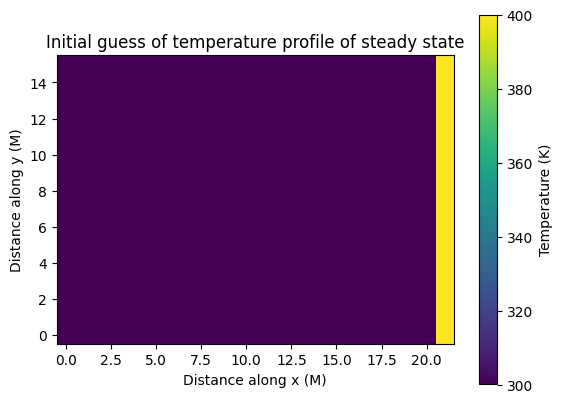

In [3]:
M = 16 #Length of bar in y + 1 (Meters)
N = 22 #Legnth of bar in x + 1 (Meters)
T1 = 300 #Kelvin
T2 = 400 #Kelvin
theta = T1 * np.ones((M,N))
theta[: ,-1] = T2
# Plot initial guess
plt.imshow(theta, origin='lower')
plt.xlabel("Distance along x (M)")
plt.ylabel("Distance along y (M)")
plt.colorbar(label="Temperature (K)")
plt.title("Initial guess of temperature profile of steady state")

### 3. Run the solver and plot the result

In [4]:
omega = 0.9
delta = 1
tol = 1e-4
iter = 1
while (delta > tol and iter < 700): 
    theta_in = np.copy(theta)
    theta = update_GS_SOR(theta, N, M, omega)
    delta = np.max(np.abs(theta_in - theta))
    iter += 1
print(f"Finished after {iter} iterations with maximum change {delta}")

Finished after 335 iterations with maximum change 9.90632341881792e-05


Text(0.5, 1.0, 'Final temperature profile of steady state')

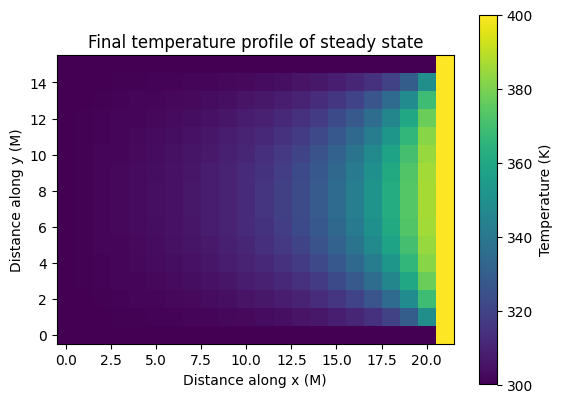

In [5]:
# Plot final
plt.imshow(theta, origin='lower')
plt.xlabel("Distance along x (M)")
plt.ylabel("Distance along y (M)")
plt.colorbar(label="Temperature (K)")
plt.title("Final temperature profile of steady state")

### Effect of changing the value of omega

By chaning the value of omega between 0 and 1 it changes the number of steps required to reach the final state that is within the tolerance of 1e-4 with:

- omega = 0.1 taking 700 cycles to complete, 
- omega = 0.5 taking 620 cycles, 
- omega = 0.7 taking 483 cycles,
- omega = 0.99 taking 286 cycles.

An omega equal to 1 gives us the jacobi method and an omega $>1$ does not guarantee stability, however does sometimes still work for example omega = 1.2 completes after 196 iterations.



### 4. Time evolution function

In [6]:
def update_temperature2D(temper, Nx, Ny, zeta):
    """Perform explicit forward FD update for heat equation
    Inputs:
    temper  Array of temperature at present timestep
    Nx, Ny  Sizes of array
    zeta    Constant of proportionality
    Returns:
    temper_next: The next temperature
    """
    temper_next = np.copy(temper)
    for i in range(1, Ny - 1): # Don't update end-points
        for j in range(1, Nx-1):
            temper_next[i,j] = temper[i,j] + zeta*(temper[i-1,j] + temper[i+1,j] 
                              + temper[i,j-1] + temper[i,j+1] - 4*temper[i, j])
    return temper_next

### 5. Set up initial conditions

Text(0.5, 1.0, 'Initial guess of temperature profile')

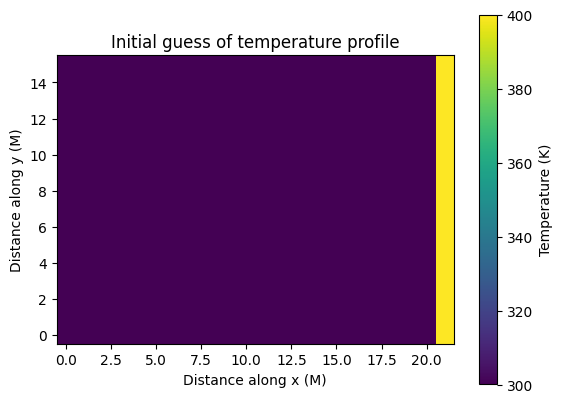

In [7]:
Nx = 22 # Length of bar in x + 1 (Meters)
Ny = 16 # Length of bar in y + 1 (Meters)
T1 = 300 #Kelvin
T2 = 400 #Kelvin
theta0 = T1 * np.ones((Ny,Nx))
theta0[: ,-1] = T2
# Plot initial guess
plt.imshow(theta0, origin='lower')
plt.xlabel("Distance along x (M)")
plt.ylabel("Distance along y (M)")
plt.colorbar(label="Temperature (K)")
plt.title("Initial guess of temperature profile")

### 6. Propagate the solution and store selected points

In [17]:
Nt = 400 #Number of timesteps
zeta = 0.1
for i in range(Nt - 1):
    theta_next = update_temperature2D(theta0, Nx, Ny, zeta)
    theta0 = theta_next

### Plot the final and steady-state solutions
Below, we also plot the difference between the two

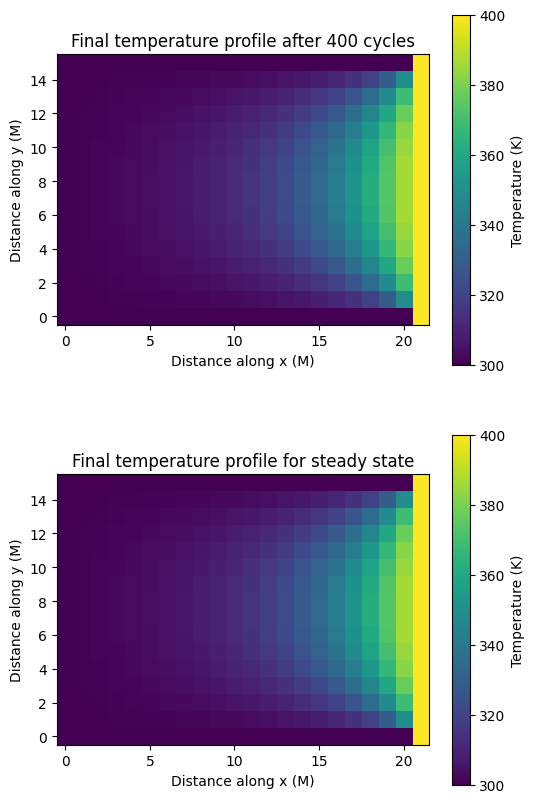

In [18]:
#Plotting the final temperature profile
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

#Plotting the time dependant temperature profile
plot1 = ax1.imshow(theta0, origin='lower')
ax1.set(xlabel="Distance along x (M)", ylabel="Distance along y (M)", 
        title="Final temperature profile after 400 cycles")
plt.colorbar(plot1, label="Temperature (K)")

#Plotting the steady state temperature profile
plot2 = ax2.imshow(theta, origin='lower')
ax2.set(xlabel="Distance along x (M)", ylabel="Distance along y (M)", 
        title="Final temperature profile for steady state")
plt.colorbar(plot2, label="Temperature (K)")


Text(0.5, 1.0, 'Difference between the two temperature profiles')

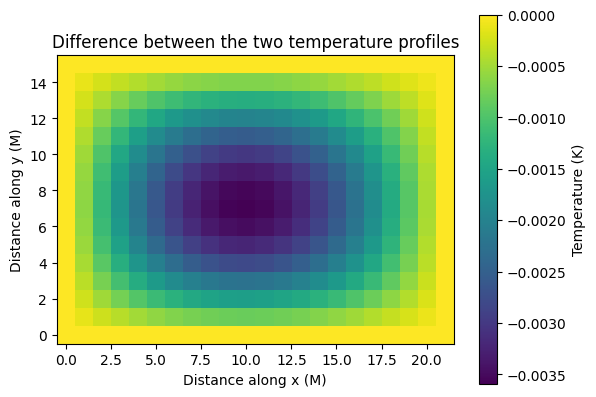

In [19]:
#Plotting the difference between the temperature profiles
plt.imshow(theta - theta0, origin='lower')
plt.xlabel("Distance along x (M)")
plt.ylabel("Distance along y (M)")
plt.colorbar(label="Temperature (K)")
plt.title("Difference between the two temperature profiles")

### Difference betwen graphs

We can see from the difference between the two graphs that after 400 cycles the time dependent solution does not quite reach the steady state, however does get pretty close, with a maximum temperature difference between the two of around 1.8K in the middle of the plot.

## Oscillating boundary condition

I will now explore the effect of having an oscillating boundary condition for the hot end of the rod. The temperture will oscillate sinusoidally between 400K and 200K. The initial conditions will be the same as the other two temperature profiles.
$\newline$
The equation used to update the values of the rightmost boundary condition is $100 \cos(0.05t) + 300$ which given a sinusoidal temperature between 400K and 200K with time period of $40 \pi$. Such a large time period was used so that the temperature changed slower so the bar had more time to heat up and cool down.

In [20]:
#Setting up inital conditions
Nx = 22 # Length of bar in x + 1 (Meters)
Ny = 16 # Length of bar in y + 1 (Meters)
T1 = 300 #Kelvin
T2 = 400 #Kelvin
zeta = 0.1
theta1 = T1 * np.ones((Ny,Nx))
theta1[: ,-1] = T2

<IPython.core.display.Javascript object>


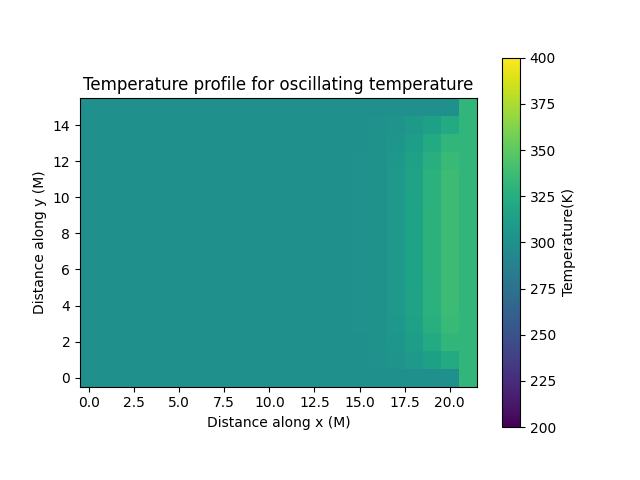

Text(0, 0.5, 'Distance along y (M)')

In [21]:
import matplotlib.animation as anim
%matplotlib notebook

fig = plt.figure() 
ax = plt.axes()

temp_profile = plt.imshow(theta1, origin='lower', vmin = 200, vmax=400)

#Initialisation of the bar
def init():
    temp_profile.set_data(theta1)
    return [temp_profile]

#Update function of the bar
def animate(t):
    temp_profile_arr = temp_profile.get_array()
    temp_profile_arr[:, -1] = 100*np.cos(0.05*t) + 300
    temp_profile_arr = update_temperature2D(temp_profile_arr, Nx, Ny, zeta)
    temp_profile.set_array(temp_profile_arr)
    
    return [temp_profile]

anim = anim.FuncAnimation(fig, animate, init_func=init, frames=620, interval=1, blit=True)
plt.colorbar(label='Temperature(K)')
plt.title("Temperature profile for oscillating temperature")
plt.xlabel("Distance along x (M)")
plt.ylabel("Distance along y (M)")


With these boundary conditions we can see that the theoretical oscillating heat sink attatched to the right of the 2D rod heats up and cools down the right side of the bar as expected, but never reaches the left side of the bar as it is not hot enough compared to the left boundary condition and doesn't spend long enough at the hotter (or colder) temperature to change it.